# Project 2 -- L Larkin

Submit Assignment 
Due  No Due Date   
 Points 10 
 Submitting a website url 
 
Continue to explore your dataset using visualization techniques and begin to identify predictive features for the price of a house. What attributes are most relevant in this dataset?

Note: This dataset is really large, so some of the visualization functions in Seaborn might not work or will take a long time to process.


In [1]:
# Load libraries
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

## Scrub NYC real estate sales datafile (done on Excel and load it)

In [40]:
Location = "datasets/datasets/nyc-rolling-sales-SCRUBBED-CLASS.csv"
df = pd.read_csv(Location)

In [41]:
df.head()

,BOROUGH,NEIGHBORHOOD,BUILDING_CLASS_CATEGORY,TAX CLASS_AT_PRESENT,BLOCK,LOT,EASEMENT,BUILDING_CLASS_AT_PRESENT,ADDRESS,APARTMENT_NUMBER,...,RESIDENTIAL_UNITS,COMMERCIAL_UNITS,TOTAL_UNITS,LAND_SQUARE_FEET,GROSS_SQUARE_FEET,YEAR_BUILT,TAX_CLASS_AT_TIME_OF_SALE,BUILDING_CLASS_AT_TIME_OF_SALE,SALE_PRICE,SALE_DATE
0,5,NEW BRIGHTON,01 ONE FAMILY DWELLINGS,1,30,1,,A1,179 WESTERVELT AVENUE,,...,1,0,1,2775,1296,1925,1,A1,280000,6/20/2017
1,5,NEW BRIGHTON,01 ONE FAMILY DWELLINGS,1,30,1,,A1,179 WESTERVELT AVENUE,,...,1,0,1,2775,1296,1925,1,A1,260000,1/11/2017
2,5,NEW BRIGHTON,02 TWO FAMILY DWELLINGS,1,40,1,,B2,58 TAFT AVENUE,,...,2,0,2,2500,1933,1901,1,B2,214968,12/16/2016
3,5,LIVINGSTON,02 TWO FAMILY DWELLINGS,1,70,1,,B2,91 TYSEN STREET,,...,2,0,2,2450,1836,1920,1,B2,350000,9/9/2016
4,5,WEST NEW BRIGHTON,01 ONE FAMILY DWELLINGS,1,125,1,,A5,343 CASTLETON AVENUE,,...,1,0,1,3996,1120,1955,1,A5,301000,6/2/2017


## Look at relationship between borough and sale price

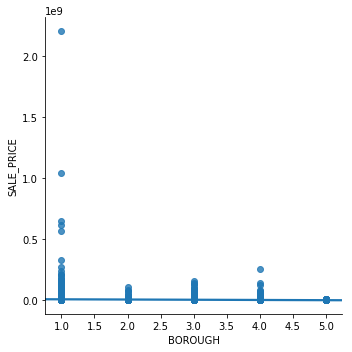

In [42]:
sns.lmplot(x='BOROUGH',y='SALE_PRICE',data=df)

In [49]:
df['SALE_PRICE'].groupby(df['BOROUGH']).mean()

BOROUGH
1    2.085656e+07
2    1.069615e+06
3    1.592610e+06
4    9.466952e+05
5    5.481099e+05
Name: SALE_PRICE, dtype: float64

In [52]:
df['SALE_PRICE'].groupby(df['BOROUGH']).std()

BOROUGH
1    9.308154e+07
2    3.883330e+06
3    4.853163e+06
4    3.793226e+06
5    4.645212e+05
Name: SALE_PRICE, dtype: float64

In [50]:
df['BOROUGH'].value_counts()

4    10605
3     8150
5     4858
2     3352
1      893
Name: BOROUGH, dtype: int64

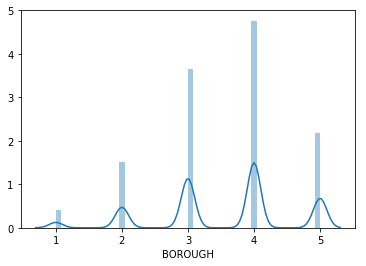

In [51]:
sns.distplot(df['BOROUGH'])

## Conclusions
###   >Borough 1 (Manhattan) has significantly fewer real estate sales compared with the other four borroughs with a much higher variability in price.
###   >There is very little variability in prices in the other boroughs but sales are significantly higher (by a factor of 4-10x) vis-a-vis Manhattan


## Now look at relationship between lot size and sale price

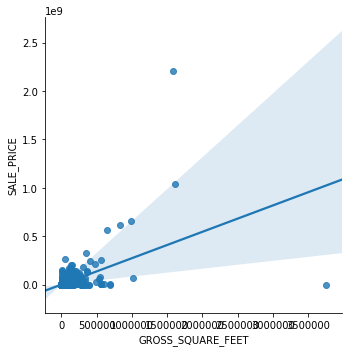

In [43]:
sns.lmplot(x='GROSS_SQUARE_FEET',y='SALE_PRICE',data=df)

In [44]:
# Outliers are distorting the data
# Remove SALE_PRICE outliers using SD method

## Calculate SD
meanprice = df['SALE_PRICE'].mean()
stdprice = df['SALE_PRICE'].std()
toprange = meanprice + stdprice * 1.96
botrange = meanprice - stdprice * 1.96

pricedf = df.copy() #to not mess up the original df
pricedf = pricedf.drop(pricedf[pricedf['SALE_PRICE'] > toprange].index)
pricedf = pricedf.drop(pricedf[pricedf['SALE_PRICE'] < botrange].index)


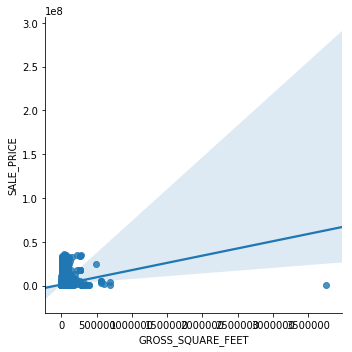

In [45]:
# Replot
sns.lmplot(x='GROSS_SQUARE_FEET',y='SALE_PRICE',data=pricedf)

In [46]:
# Remove GROSS_SQUARE FEET outliers using SD method

## Calculate SD
meanlotsize = df['GROSS_SQUARE_FEET'].mean()
stdlotsize = df['GROSS_SQUARE_FEET'].std()
toprange = meanlotsize + stdlotsize * 1.96
botrange = meanlotsize - stdlotsize * 1.96

lotsizedf = df.copy() #to not mess up the original df
lotsizedf = lotsizedf.drop(lotsizedf[lotsizedf['GROSS_SQUARE_FEET'] > toprange].index)
lotsizedf = lotsizedf.drop(lotsizedf[lotsizedf['GROSS_SQUARE_FEET'] < botrange].index)


In [47]:
lotsizedf.describe()

,BOROUGH,BLOCK,LOT,ZIP_CODE,RESIDENTIAL_UNITS,COMMERCIAL_UNITS,TOTAL_UNITS,LAND_SQUARE_FEET,GROSS_SQUARE_FEET,YEAR_BUILT,TAX_CLASS_AT_TIME_OF_SALE,SALE_PRICE
count,27686.000000,27686.000000,27686.000000,27686.000000,27686.000000,27686.000000,27686.000000,27686.000000,27686.000000,27686.000000,27686.000000,2.768600e+04
mean,3.553132,5588.618074,61.731850,11001.272087,2.311132,0.237376,2.547063,3312.506032,2826.404464,1940.610272,1.211370,1.248840e+06
std,1.007635,3767.189668,117.617629,473.474414,4.794780,13.616858,14.442500,3756.200821,4822.109502,30.414147,0.657408,3.809348e+06
min,1.000000,5.000000,1.000000,10001.000000,0.000000,0.000000,1.000000,200.000000,120.000000,1800.000000,1.000000,1.007000e+05
25%,3.000000,2756.000000,19.000000,10462.000000,1.000000,0.000000,1.000000,2000.000000,1360.000000,1920.000000,1.000000,4.480000e+05
50%,4.000000,4961.000000,38.000000,11221.000000,2.000000,0.000000,2.000000,2500.000000,1857.000000,1930.000000,1.000000,6.400000e+05
75%,4.000000,7854.000000,64.000000,11373.000000,2.000000,0.000000,2.000000,3982.750000,2628.750000,1959.000000,1.000000,9.720000e+05
max,5.000000,16319.000000,3710.000000,11694.000000,107.000000,2261.000000,2261.000000,256900.000000,70000.000000,2017.000000,4.000000,2.681242e+08


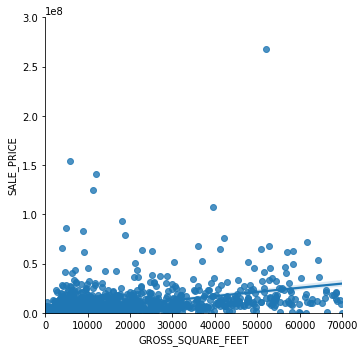

In [48]:
# Replot

dfclean=sns.lmplot(x='GROSS_SQUARE_FEET',y='SALE_PRICE',data=lotsizedf)
dfclean=dfclean.set_axis_labels("GROSS_SQUARE_FEET", "SALE_PRICE").set(xlim=(0, 70000), ylim=(0, 300000000))


In [30]:
lotsizedf.corr()

,BOROUGH,BLOCK,LOT,ZIP_CODE,RESIDENTIAL_UNITS,COMMERCIAL_UNITS,TOTAL_UNITS,LAND_SQUARE_FEET,GROSS_SQUARE_FEET,YEAR_BUILT,TAX_CLASS_AT_TIME_OF_SALE,SALE_PRICE
BOROUGH,1.000000,0.156744,0.024369,0.073840,-0.171997,-0.012971,-0.107086,0.052844,-0.149709,0.353360,-0.224083,-0.147508
BLOCK,0.156744,1.000000,0.041076,0.509199,-0.100876,-0.002428,-0.058544,-0.010254,-0.091985,0.066282,-0.172489,-0.096321
LOT,0.024369,0.041076,1.000000,-0.087735,-0.014639,-0.003631,-0.011199,0.021655,-0.013868,0.108839,-0.041512,-0.012543
ZIP_CODE,0.073840,0.509199,-0.087735,1.000000,-0.089435,-0.004110,-0.053498,-0.101627,-0.092853,-0.230346,-0.085987,-0.091386
RESIDENTIAL_UNITS,-0.171997,-0.100876,-0.014639,-0.089435,1.000000,0.004297,0.564119,0.381631,0.488562,-0.036797,0.121905,0.234719
COMMERCIAL_UNITS,-0.012971,-0.002428,-0.003631,-0.004110,0.004297,1.000000,0.828098,0.019343,0.038607,-0.003410,0.067307,0.050392
TOTAL_UNITS,-0.107086,-0.058544,-0.011199,-0.053498,0.564119,0.828098,1.000000,0.229906,0.305764,-0.023443,0.123667,0.173181
LAND_SQUARE_FEET,0.052844,-0.010254,0.021655,-0.101627,0.381631,0.019343,0.229906,1.000000,0.452895,0.076885,0.328123,0.278986
GROSS_SQUARE_FEET,-0.149709,-0.091985,-0.013868,-0.092853,0.488562,0.038607,0.305764,0.452895,1.000000,0.006582,0.242093,0.817208
YEAR_BUILT,0.353360,0.066282,0.108839,-0.230346,-0.036797,-0.003410,-0.023443,0.076885,0.006582,1.000000,-0.042821,-0.007564


## Conclusion: There is very high correlation between lot size and sale price -- which is not surprising